In [1]:
import numpy as np
import pandas as pd
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_excel('/content/drive/MyDrive/Nighttime_and_population_data.xlsx')

In [4]:
df.head()

,LGA,Average Nighttime mean,system:index,AREA,STATE,Latitude,Longitude,PERIMETER,Population
0,Aba North,3.422659,698,18.116,Abia,5.100754,7.359617,31.927,245825.2780
1,Aba South,1.949728,699,51.131,Abia,5.071438,7.341737,29.855,380211.9108
2,Arochukwu,0.089510,656,386.125,Abia,5.498931,7.795863,133.618,146354.5149
3,Bende,0.076452,636,603.923,Abia,5.655239,7.588170,141.298,236492.5846
4,Ikwuano,0.066905,674,237.941,Abia,5.384024,7.568317,78.189,153494.9633


In [5]:
df.describe()

,Average Nighttime mean,system:index,AREA,Latitude,Longitude,PERIMETER,Population
count,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,7.740000e+02
mean,0.739801,387.494832,1173.072955,8.651160,7.362809,151.709443,2.329035e+05
std,2.468787,223.587767,1419.020617,2.648851,2.460057,95.130596,2.061493e+05
min,-0.031743,0.000000,11.645000,4.457937,2.800247,13.097000,3.459978e+03
25%,0.006954,194.250000,287.411750,6.469302,5.524614,82.488250,1.149685e+05
50%,0.044481,387.500000,691.699500,8.003153,7.307865,130.497500,1.902539e+05
75%,0.224103,580.750000,1519.811000,11.373730,8.556582,202.914750,2.844820e+05
max,28.572277,774.000000,10357.668000,13.686694,14.525843,582.572000,2.181858e+06


In [6]:
#check for number of negative values
df[df['Average Nighttime mean'] < 0].count()

#too many negative values although close to zero, so I left as is

LGA                       116
Average Nighttime mean    116
system:index              116
AREA                      116
STATE                     116
Latitude                  116
Longitude                 116
PERIMETER                 116
Population                116
dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

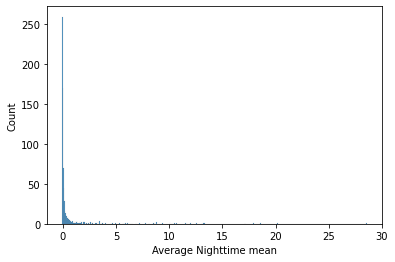

In [8]:
#visualize the distribution of the nighttime column
sns.histplot(df['Average Nighttime mean'])

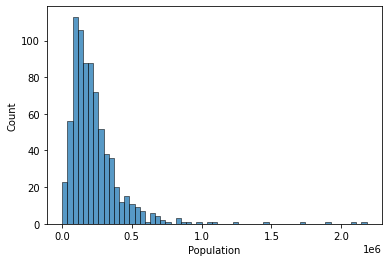

In [9]:
#visualize the distribution of the population
sns.histplot(df['Population'])

In [10]:
#create a column called population density. To metric to indicate how populated an area is
df['Population Density'] = df['Population'] / df['AREA']

In [11]:
#split the nighttime data into 5 class based on its distribution
Q1 = np.percentile(df['Average Nighttime mean'], 20, interpolation = 'midpoint')
Q2 = np.percentile(df['Average Nighttime mean'], 40, interpolation = 'midpoint')
Q3 = np.percentile(df['Average Nighttime mean'], 60, interpolation = 'midpoint')
Q4 = np.percentile(df['Average Nighttime mean'], 80, interpolation = 'midpoint')
Q5 = np.percentile(df['Average Nighttime mean'], 100, interpolation = 'midpoint')

In [12]:
print(min(df['Average Nighttime mean']))
print()
print(max(df['Average Nighttime mean']))

-0.031742745

28.57227675


In [13]:
print(Q1)
print(Q2)
print(Q3)
print(Q4)
print(Q5)

0.0036519165
0.024093387
0.0786186105
0.3702403995
28.57227675


In [14]:
#define the conditions for splitting each sample
conditions = [
    (df['Average Nighttime mean'] <= Q1),
    (df['Average Nighttime mean'] > Q1) & (df['Average Nighttime mean'] <= Q2),
    (df['Average Nighttime mean'] > Q2) & (df['Average Nighttime mean'] <= Q3),
    (df['Average Nighttime mean'] > Q3) & (df['Average Nighttime mean'] <= Q4),
    (df['Average Nighttime mean'] > Q4)
    ]

In [15]:
#define the 5 classes
values = ['low', 'moderately_low', 'medium_intensity', 'moderate_high_intensity', 'high_intensity']

# create a new column and input values based on the set conditions
df['Night Light Class'] = np.select(conditions, values)

df.head()

,LGA,Average Nighttime mean,system:index,AREA,STATE,Latitude,Longitude,PERIMETER,Population,Population Density,Night Light Class
0,Aba North,3.422659,698,18.116,Abia,5.100754,7.359617,31.927,245825.2780,13569.511923,high_intensity
1,Aba South,1.949728,699,51.131,Abia,5.071438,7.341737,29.855,380211.9108,7436.035102,high_intensity
2,Arochukwu,0.089510,656,386.125,Abia,5.498931,7.795863,133.618,146354.5149,379.034030,moderate_high_intensity
3,Bende,0.076452,636,603.923,Abia,5.655239,7.588170,141.298,236492.5846,391.593936,medium_intensity
4,Ikwuano,0.066905,674,237.941,Abia,5.384024,7.568317,78.189,153494.9633,645.096740,medium_intensity


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


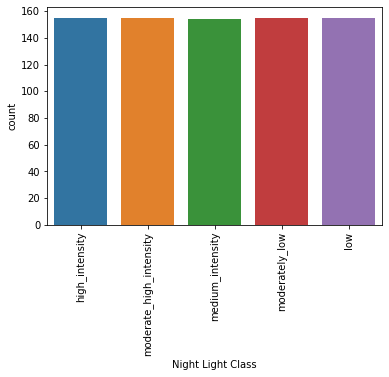

In [16]:
#visualize how the night time classes are distributed
sns.countplot(df['Night Light Class'])
plt.xticks(rotation=90);

#from the plot, the classes are almost spread evenly. Interesting coincidence perhaps.

In [17]:
df['Population Density'].describe()

count      774.000000
mean      1057.603096
std       3006.950210
min          4.368622
25%        109.645338
50%        246.086803
75%        586.832764
max      34682.189336
Name: Population Density, dtype: float64

In [18]:
#sort dataframe from lowest population density to highest
df.sort_values('Population Density')

,LGA,Average Nighttime mean,system:index,AREA,STATE,Latitude,Longitude,PERIMETER,Population,Population Density,Night Light Class
216,Warri South-West,2.050127,638,1677.985,Delta,5.571430,5.409900,232.485,7330.4822,4.368622,high_intensity
41,Toungo,-0.006275,358,4627.869,Adamawa,8.001850,11.850566,340.831,49834.2979,10.768303,low
730,Gashaka,0.004144,381,8267.946,Taraba,7.556608,11.430372,412.380,97738.0819,11.821326,moderately_low
735,Kurmi,-0.003896,430,4969.120,Taraba,7.229056,10.667912,358.321,91719.0622,18.457808,low
214,Warri North,0.584901,606,1746.102,Delta,5.879112,5.252769,252.816,35259.6832,20.193370,high_intensity
...,...,...,...,...,...,...,...,...,...,...,...
520,Mushin,13.109613,562,17.387,Lagos,6.551415,3.342004,18.422,350625.5487,20165.960125,high_intensity
637,Ibadan North-East,1.657818,469,17.724,Oyo,7.374327,3.931289,22.323,367239.7494,20719.913643,high_intensity
506,Ajeromi-Ifelodun,10.497266,574,11.645,Lagos,6.466175,3.324313,13.097,314222.5886,26983.476909,high_intensity
399,Nassarawa,17.912518,133,19.019,Kano,12.005883,8.508378,21.054,641461.4104,33727.399464,high_intensity


In [19]:
df['Night Light Class'].unique()

array(['high_intensity', 'moderate_high_intensity', 'medium_intensity',
       'moderately_low', 'low'], dtype=object)

In [20]:
#create 5 new dataframe for each of the night time classes
low_df = df[df['Night Light Class'] == 'low']
moderately_low_df = df[df['Night Light Class'] == 'moderately_low']
medium_intensity_df = df[df['Night Light Class'] == 'medium_intensity']
moderate_high_intensity_df = df[df['Night Light Class'] == 'moderate_high_intensity']
high_intensity_df = df[df['Night Light Class'] == 'high_intensity']

In [21]:
#sort each of the dataframe based on the population density from lowest to highest

sorted_low_df = low_df.sort_values('Population Density', ascending=False)
sorted_moderately_low_df = moderately_low_df.sort_values('Population Density', ascending=False)
sorted_medium_intensity_df = medium_intensity_df.sort_values('Population Density', ascending=False)
sorted_moderate_high_intensity_df = moderate_high_intensity_df.sort_values('Population Density', ascending=False)
sorted_high_intensity_df = high_intensity_df.sort_values('Population Density', ascending=False)


In [22]:
#check the lga with low night time and high population density. There is energy demand
sorted_low_df

,LGA,Average Nighttime mean,system:index,AREA,STATE,Latitude,Longitude,PERIMETER,Population,Population Density,Night Light Class
37,Mubi South,-0.017975,252,185.577,Adamawa,10.190380,13.393257,57.961,170740.0858,920.049822,low
223,Ikwo,0.003647,600,463.579,Ebonyi,6.078639,8.172586,114.720,355238.0451,766.294515,low
474,Idah,0.003247,502,47.846,Kogi,7.060723,6.713154,30.648,35322.7548,738.259307,low
382,Garko,-0.003368,172,458.608,Kano,11.550638,8.808934,127.175,219544.2736,478.718805,low
384,Gaya,0.003059,154,619.544,Kano,11.772951,9.016087,119.561,265273.4781,428.175365,low
...,...,...,...,...,...,...,...,...,...,...,...
153,Damboa,-0.010433,188,6485.544,Borno,11.127215,12.837075,427.860,190951.2600,29.442597,low
713,Kebbe,0.001207,117,2758.110,Sokoto,11.882302,4.805728,233.705,79882.2843,28.962690,low
757,Tarmuwa,-0.000991,86,4504.328,Yobe,12.210048,11.828837,319.692,129830.2395,28.823443,low
735,Kurmi,-0.003896,430,4969.120,Taraba,7.229056,10.667912,358.321,91719.0622,18.457808,low


In [23]:
#list LGA with top energy demand
[x for x in sorted_low_df['LGA']]

['Mubi South',
 'Ikwo',
 'Idah',
 'Garko',
 'Gaya',
 'Doma',
 'Kibiya',
 'Baure',
 'Ikara',
 'Rogo',
 'Shira',
 'Sumaila',
 'Matazu',
 'Babura',
 'Giade',
 'Batsari',
 'Mubi North',
 'Danmusa',
 'Madagali',
 'Soba',
 'Lere',
 'Gwadabawa',
 'Michika',
 'Ukum',
 'Kubau',
 'Billiri',
 'Logo',
 'Musawa',
 'Ankpa',
 'Takum',
 'Bade',
 'Guyuk',
 'Shani',
 'Illela',
 'Okpokwu',
 'Kwaya Kusar',
 'Maiha',
 'Birnin-Magaji-Kiyaw',
 'Apa',
 'Safana',
 'Vandeikya',
 'Kaltungo',
 'Bayo',
 'Sabon Birni',
 'Shomgom',
 'Warji',
 'Silame',
 'Zaki',
 'Katsina-Ala',
 'Darazo',
 'Shinkafi',
 'Dass',
 'Askira-Uba',
 'Konshisha',
 'Monguno',
 'Kauru',
 'Wukari',
 'Shanga',
 'Hawul',
 'Kwande',
 'Balanga',
 'Goronyo',
 'Shendam',
 'Gwoza',
 'Bogoro',
 'Jada',
 'Ngala',
 'Keana',
 'Mikang',
 'Yauri',
 'Fika',
 'Ganye',
 'Ikom',
 'Tafawa-Balewa',
 "Qua'an Pan",
 'Wasagu-Danko',
 'Sakaba',
 'Girie',
 'Ado',
 'Ganjuwa',
 'Gassol',
 'Mayo-Belwa',
 'Obi',
 'Zurmi',
 'Lau',
 'Gulani',
 'Langtang South',
 'Biu',
 'Ma

In [24]:
#list states where LGA has high energy demand
[x for x in sorted_low_df['STATE']]

['Adamawa',
 'Ebonyi',
 'Kogi',
 'Kano',
 'Kano',
 'Nasarawa',
 'Kano',
 'Katsina',
 'Kaduna',
 'Kano',
 'Bauchi',
 'Kano',
 'Katsina',
 'Jigawa',
 'Bauchi',
 'Katsina',
 'Adamawa',
 'Katsina',
 'Adamawa',
 'Kaduna',
 'Kaduna',
 'Sokoto',
 'Adamawa',
 'Benue',
 'Kaduna',
 'Gombe',
 'Benue',
 'Katsina',
 'Kogi',
 'Taraba',
 'Yobe',
 'Adamawa',
 'Borno',
 'Sokoto',
 'Benue',
 'Borno',
 'Adamawa',
 'Zamfara',
 'Benue',
 'Katsina',
 'Benue',
 'Gombe',
 'Borno',
 'Sokoto',
 'Gombe',
 'Bauchi',
 'Sokoto',
 'Bauchi',
 'Benue',
 'Bauchi',
 'Zamfara',
 'Bauchi',
 'Borno',
 'Benue',
 'Borno',
 'Kaduna',
 'Taraba',
 'Kebbi',
 'Borno',
 'Benue',
 'Gombe',
 'Sokoto',
 'Plateau',
 'Borno',
 'Bauchi',
 'Adamawa',
 'Borno',
 'Nasarawa',
 'Plateau',
 'Kebbi',
 'Yobe',
 'Adamawa',
 'Cross River',
 'Bauchi',
 'Plateau',
 'Kebbi',
 'Kebbi',
 'Adamawa',
 'Benue',
 'Bauchi',
 'Taraba',
 'Adamawa',
 'Nasarawa',
 'Zamfara',
 'Taraba',
 'Yobe',
 'Plateau',
 'Borno',
 'Yobe',
 'Borno',
 'Adamawa',
 'Kaduna',
 '

In [25]:
#stack each class of the dataframe to one dataframe
sorted_energy_demand_df = pd.concat([sorted_low_df, sorted_moderately_low_df, sorted_medium_intensity_df, sorted_moderate_high_intensity_df, sorted_high_intensity_df], ignore_index=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


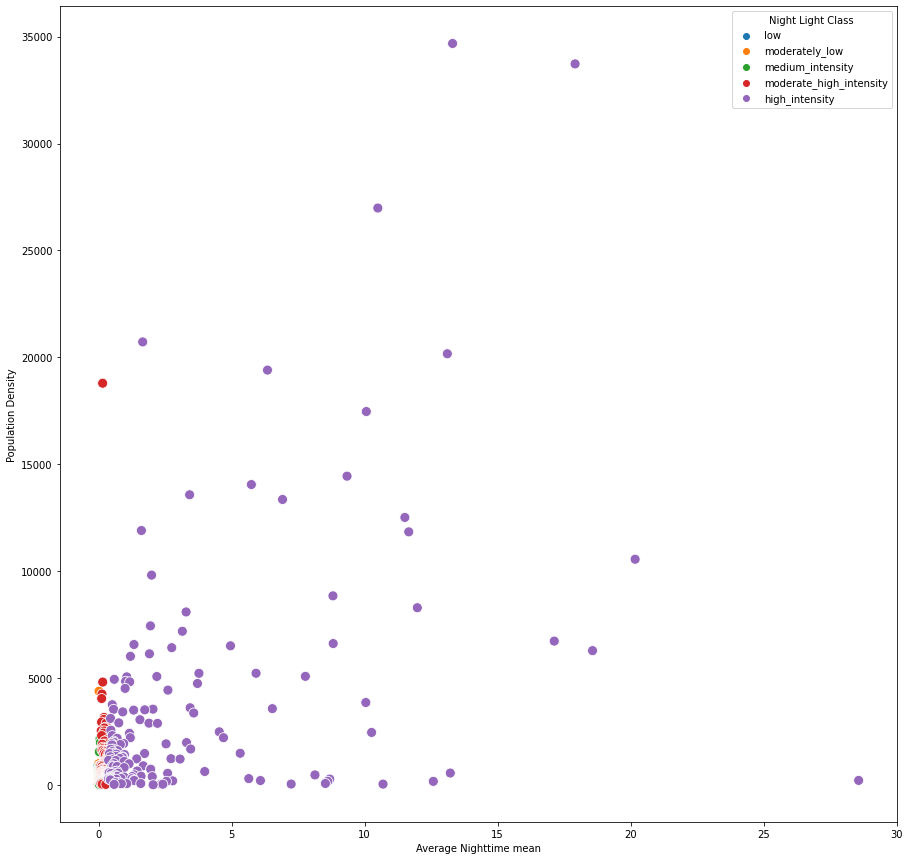

In [26]:
#draw a scatterplot to show the distribution of the classes
fig, ax = plt.subplots(figsize=(15, 15))
sns.scatterplot('Average Nighttime mean', 'Population Density', data=sorted_energy_demand_df, hue='Night Light Class', ax=ax, s=100)

In [27]:
#plot the scatter plot with plotly
import plotly.express as px

px.scatter(sorted_energy_demand_df, x='Average Nighttime mean', y='Population Density', color='Night Light Class')